# FOXSI-3 Ghost Rays PhoEniX

In [1]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap 
import numpy as np
import astropy.io.fits as pyfits
from matplotlib.ticker import MultipleLocator

In [ ]:
ang = [-82.5000, -75.0000, 67.5000, 75.0000, -97.5000, -90.0000, 60.0000]  ## Detector angles
x,y = -650, 40 ## Target center

### Defining transparent colors

In [ ]:
tred = {'red' :  ((0.0, 0.0, 1.0), 
                    (1.0, 1.0, 0.0)), 
        'green': ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'blue':  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'alpha': ((0.0, 0.0, 0.0), 
                    (1.0, 1.0, 0.0))}

tgreen = {'red' :  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'green': ((0.0, 0.0, 1.0), 
                    (1.0, 1.0, 0.0)), 
        'blue':  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'alpha': ((0.0, 0.0, 0.0), 
                    (1.0, 0.9, 0.0))}

txray = {'red' :  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'green': ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'blue':  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'alpha': ((0.0, 0.0, 0.0), 
                    (1.0, 0.9, 0.0))}


tred   = LinearSegmentedColormap('tred', tred) 
tgreen = LinearSegmentedColormap('tgreen', tgreen) 
txray = LinearSegmentedColormap('txray', txray) 

In [ ]:
BraysA = load_rays('/Users/Kamilobu/Desktop/FOXSI3-GR-Prediction/makerays/rays/10Shell.csv')
#BraysB = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/T4FOXSI2/makerays/rays/D6AR1B.csv')
#BraysC = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/T4FOXSI2/makerays/rays/D6AR1C.csv')
Brays = BraysA #+ BraysB + BraysC

# Fix little bug in rays:
for ray in Brays:
    ray.hist = ray.hist.tolist()
# Create detector :
detector = Detector(width=40,
                    height=40,
                    normal = [0,0,1],
                    center = [0,0,230], # This is corrected by the detectors-paper distance
                    reso = [1024,1024])
# Detector Catch rays:
detector.catchRays(Brays)
    

In [4]:
All_Hx2, All_Hy2, All_Px2, All_Py2, All_Dx2, All_Dy2 = [], [], [], [], [], []

'''Defining D, H, and P rays for each blocker size: '''
Drays2 = [ray for ray in Brays if (ray.des[2]==230 and ray.bounces ==2 )]
Srays2 = [ray for ray in Brays if (ray.des[2]==230 and ray.bounces ==1 )]
Hrays2 = [ray for ray in Brays if (ray.des[2]==230 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
Prays2 = [ray for ray in Brays if (ray.des[2]==230 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

#sim_scale = 17.18880   # 1cm = 17.4 arcmin
sim_scale = 1031.328   # 1cm = 1031.328 arcsec

#Hyperboloid
Hx, Hy = [], []
for ray in Hrays2:
    Hx.append(ray.pos[0]*sim_scale + x)
    Hy.append(ray.pos[1]*sim_scale + y)
All_Hx2.append(Hx)
All_Hy2.append(Hy)

# Paraboloid
Px, Py = [], []
for ray in Prays2:
    Px.append(ray.pos[0]*sim_scale + x)
    Py.append(ray.pos[1]*sim_scale + y)
All_Px2.append(Px)
All_Py2.append(Py)
        
# Double
Dx, Dy = [], []
for ray in Drays2:
    Dx.append(ray.pos[0]*sim_scale + x)
    Dy.append(ray.pos[1]*sim_scale + y)
All_Dx2.append(Dx)
All_Dy2.append(Dy)

NameError: name 'Brays' is not defined

### Plotting

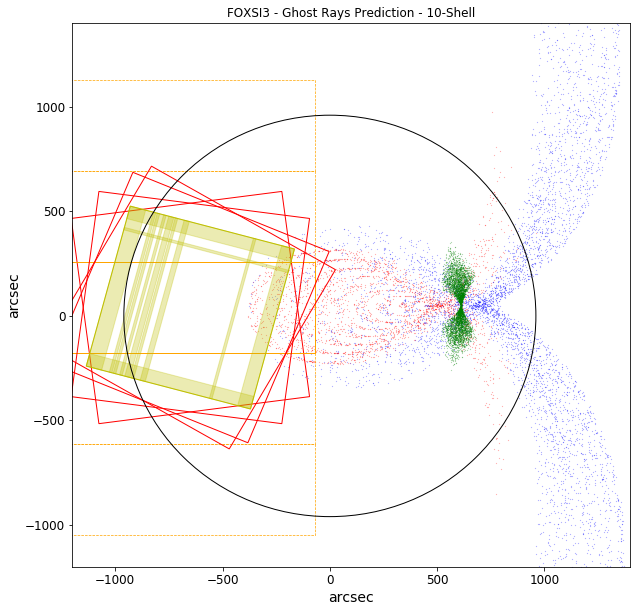

In [42]:
## Plotting
fig, ax = plt.subplots(figsize=(10,10));
## AR1
plt.scatter(All_Hx2,All_Hy2,color='red',s=.02,alpha=0.8)
plt.scatter(All_Px2,All_Py2,color='blue',s=.02,alpha=0.8)
plt.scatter(All_Dx2,All_Dy2,color='green',s=.02,alpha=0.8)
## ornaments
plt.xlim(-1200,1400)
plt.ylim(-1200,1400)
plt.xlabel('arcsec',fontsize=14)
plt.ylabel('arcsec',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('FOXSI3 - Ghost Rays Prediction - 10-Shell')
''' ---- FOVs --- '''
## Pos0 - Si
l = 990
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[0]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[0]-135)) + 1)
rect = patches.Rectangle((x-l/2+mx,y-l/2+my),990,990,angle=ang[0],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
## Pos1 PhoEniX
lphx = 1161.7
lphy = 435.6
rect = patches.Rectangle((x-lphx/2,y-lphy/2),lphx,lphy,linewidth=1,edgecolor='orange',facecolor='none')
ax.add_patch(rect)
for i in range (-2,3):
    rect = patches.Rectangle((x-lphx/2,y-lphy*(1/2+i)),lphx,lphy,linewidth=.7,edgecolor='orange',facecolor='none',linestyle='dashed')
    ax.add_patch(rect) 
## Pos2 - Si
l = 990
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[2]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[2]-135)) + 1)
rect = patches.Rectangle((x-l/2+mx,y-l/2+my),990,990,angle=ang[2],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
## Pos4 - Si
l = 990
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[4]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[4]-135)) + 1)
rect = patches.Rectangle((x-l/2+mx,y-l/2+my),990,990,angle=ang[4],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
## Pos6 - Si
l = 990
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[6]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[6]-135)) + 1)
rect = patches.Rectangle((x-l/2+mx,y-l/2+my),990,990,angle=ang[6],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
## Pos3 CdTe
l = 792
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[3]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[3]-135)) + 1)
rect = patches.Rectangle((x-l/2+mx,y-l/2+my),l,l,angle=ang[3],linewidth=1,edgecolor='y',facecolor='none')
ax.add_patch(rect)
## bad strips
dsx = [0,674.5,730.2]
ldx = [61.9,12.4,61.9]
for d,ld in zip(dsx,ldx):
    dx = d * np.cos(np.deg2rad(ang[3]))
    dy = d * np.sin(np.deg2rad(ang[3]))
    rect = patches.Rectangle((x-l/2+mx+dx,y-l/2+my+dy),ld,l,angle=ang[3],linewidth=1,edgecolor='y',facecolor='y',alpha=0.3)
    ax.add_patch(rect)
dsy = [0,185.6,507.4,563.1,581.7,618.8,649.7,668.3,717.8]
ldy = [61.9,12.4,24.8,12.4,24.7,12.4,12.4,12.4,74.3]
for d,ld in zip(dsy,ldy):
    dx = d * np.sin(np.deg2rad(ang[3]))
    dy = d * np.cos(np.deg2rad(ang[3]))
    rect = patches.Rectangle((x-l/2+mx-dx,y-l/2+my+dy),l,ld,angle=ang[3],linewidth=1,edgecolor='y',facecolor='y',alpha=0.3)
    ax.add_patch(rect)    
## Solar Limb
circ = patches.Circle((0,0),radius= 960,fill=False);ax.add_patch(circ)
plt.show()

### Other CdTe Detector

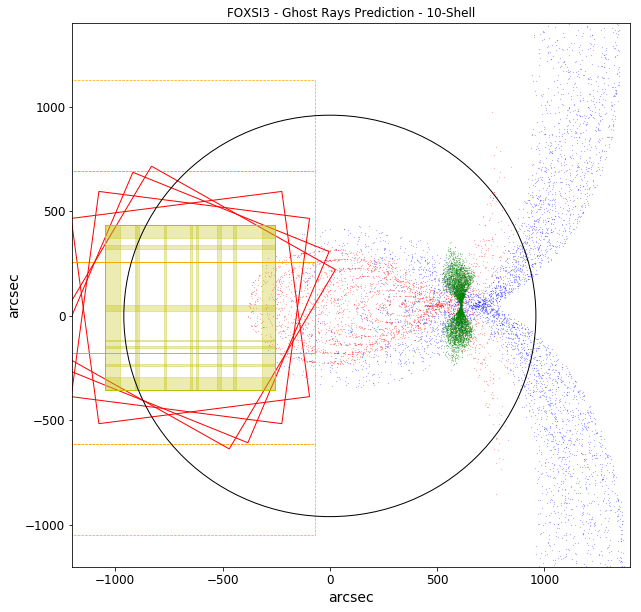

In [43]:
## Plotting
fig, ax = plt.subplots(figsize=(10,10));
## AR1
plt.scatter(All_Hx2,All_Hy2,color='red',s=.02,alpha=0.8)
plt.scatter(All_Px2,All_Py2,color='blue',s=.02,alpha=0.8)
plt.scatter(All_Dx2,All_Dy2,color='green',s=.02,alpha=0.8)
## ornaments
plt.xlim(-1200,1400)
plt.ylim(-1200,1400)
plt.xlabel('arcsec',fontsize=14)
plt.ylabel('arcsec',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('FOXSI3 - Ghost Rays Prediction - 10-Shell')
''' ---- FOVs --- '''
## Pos0 - Si
l = 990
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[0]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[0]-135)) + 1)
rect = patches.Rectangle((x-l/2+mx,y-l/2+my),990,990,angle=ang[0],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
## Pos1 PhoEniX
lphx = 1161.7
lphy = 435.6
rect = patches.Rectangle((x-lphx/2,y-lphy/2),lphx,lphy,linewidth=1,edgecolor='orange',facecolor='none')
ax.add_patch(rect)
for i in range (-2,3):
    rect = patches.Rectangle((x-lphx/2,y-lphy*(1/2+i)),lphx,lphy,linewidth=.7,edgecolor='orange',facecolor='none',linestyle='dashed')
    ax.add_patch(rect) 
## Pos2 - Si
l = 990
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[2]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[2]-135)) + 1)
rect = patches.Rectangle((x-l/2+mx,y-l/2+my),990,990,angle=ang[2],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
## Pos4 - Si
l = 990
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[4]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[4]-135)) + 1)
rect = patches.Rectangle((x-l/2+mx,y-l/2+my),990,990,angle=ang[4],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
## Pos6 - Si
l = 990
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[6]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[6]-135)) + 1)
rect = patches.Rectangle((x-l/2+mx,y-l/2+my),990,990,angle=ang[6],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
## Pos5 CdTe
l = 792
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[5]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[5]-135)) + 1)
rect = patches.Rectangle((x-l/2+mx,y-l/2+my),l,l,angle=ang[5],linewidth=1,edgecolor='y',facecolor='none')
ax.add_patch(rect)
## bad strips
dsx = [0,99,383.6,550.7,581.7,665.9,730.2]
ldx = [61.9,18.6,31,6.2,6.2,8.6,61.9]
for d,ld in zip(dsx,ldx):
    dx = d * np.cos(np.deg2rad(ang[5]))
    dy = d * np.sin(np.deg2rad(ang[5]))
    rect = patches.Rectangle((x-l/2+mx+dx,y-l/2+my+dy),ld,l,angle=ang[5],linewidth=1,edgecolor='y',facecolor='y',alpha=0.3)
    ax.add_patch(rect)
dsy = [0,136.1,148.5,272.3,396,420.8,519.8,594,730.2]
ldy = [68.1,6.2,6.2,12.3,6.2,12.4,18.5,12.4,62]
for d,ld in zip(dsy,ldy):
    dx = d * np.sin(np.deg2rad(ang[5]))
    dy = d * np.cos(np.deg2rad(ang[5]))
    rect = patches.Rectangle((x-l/2+mx-dx,y-l/2+my+dy),l,ld,angle=ang[5],linewidth=1,edgecolor='y',facecolor='y',alpha=0.3)
    ax.add_patch(rect) 
## Solar Limb
circ = patches.Circle((0,0),radius= 960,fill=False);ax.add_patch(circ)
plt.show()

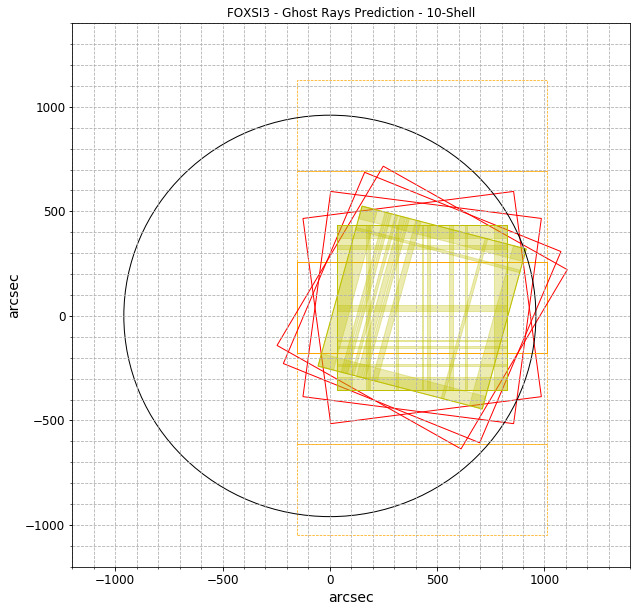

In [7]:
x,y = 430, 40 ## Target center
## Plotting
fig, ax = plt.subplots(figsize=(10,10));
## ornaments
plt.xlim(-1200,1400)
plt.ylim(-1200,1400)
plt.xlabel('arcsec',fontsize=14)
plt.ylabel('arcsec',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('FOXSI3 - Ghost Rays Prediction - 10-Shell')
''' ---- FOVs --- '''
## Pos0 - Si
l = 990
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[0]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[0]-135)) + 1)
rect = patches.Rectangle((x-l/2+mx,y-l/2+my),990,990,angle=ang[0],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
## Pos1 PhoEniX
lphx = 1161.7
lphy = 435.6
rect = patches.Rectangle((x-lphx/2,y-lphy/2),lphx,lphy,linewidth=1,edgecolor='orange',facecolor='none')
ax.add_patch(rect)
for i in range (-2,3):
    rect = patches.Rectangle((x-lphx/2,y-lphy*(1/2+i)),lphx,lphy,linewidth=.7,edgecolor='orange',facecolor='none',linestyle='dashed')
    ax.add_patch(rect) 
## Pos2 - Si
l = 990
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[2]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[2]-135)) + 1)
rect = patches.Rectangle((x-l/2+mx,y-l/2+my),990,990,angle=ang[2],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
## Pos4 - Si
l = 990
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[4]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[4]-135)) + 1)
rect = patches.Rectangle((x-l/2+mx,y-l/2+my),990,990,angle=ang[4],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
## Pos6 - Si
l = 990
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[6]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[6]-135)) + 1)
rect = patches.Rectangle((x-l/2+mx,y-l/2+my),990,990,angle=ang[6],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
## Pos5 CdTe
l = 792
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[5]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[5]-135)) + 1)
rect = patches.Rectangle((x-l/2+mx,y-l/2+my),l,l,angle=ang[5],linewidth=1,edgecolor='y',facecolor='none')
ax.add_patch(rect)
## bad strips
dsx = [0,99,383.6,550.7,581.7,665.9,730.2]
ldx = [61.9,18.6,31,6.2,6.2,8.6,61.9]
for d,ld in zip(dsx,ldx):
    dx = d * np.cos(np.deg2rad(ang[5]))
    dy = d * np.sin(np.deg2rad(ang[5]))
    rect = patches.Rectangle((x-l/2+mx+dx,y-l/2+my+dy),ld,l,angle=ang[5],linewidth=1,edgecolor='y',facecolor='y',alpha=0.3)
    ax.add_patch(rect)
dsy = [0,136.1,148.5,272.3,396,420.8,519.8,594,730.2]
ldy = [68.1,6.2,6.2,12.3,6.2,12.4,18.5,12.4,62]
for d,ld in zip(dsy,ldy):
    dx = d * np.sin(np.deg2rad(ang[5]))
    dy = d * np.cos(np.deg2rad(ang[5]))
    rect = patches.Rectangle((x-l/2+mx-dx,y-l/2+my+dy),l,ld,angle=ang[5],linewidth=1,edgecolor='y',facecolor='y',alpha=0.3)
    ax.add_patch(rect) 
## Pos3 CdTe
l = 792
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[3]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[3]-135)) + 1)
rect = patches.Rectangle((x-l/2+mx,y-l/2+my),l,l,angle=ang[3],linewidth=1,edgecolor='y',facecolor='none')
ax.add_patch(rect)
## bad strips
dsx = [0,674.5,730.2]
ldx = [61.9,12.4,61.9]
for d,ld in zip(dsx,ldx):
    dx = d * np.cos(np.deg2rad(ang[3]))
    dy = d * np.sin(np.deg2rad(ang[3]))
    rect = patches.Rectangle((x-l/2+mx+dx,y-l/2+my+dy),ld,l,angle=ang[3],linewidth=1,edgecolor='y',facecolor='y',alpha=0.3)
    ax.add_patch(rect)
dsy = [0,185.6,507.4,563.1,581.7,618.8,649.7,668.3,717.8]
ldy = [61.9,12.4,24.8,12.4,24.7,12.4,12.4,12.4,74.3]
for d,ld in zip(dsy,ldy):
    dx = d * np.sin(np.deg2rad(ang[3]))
    dy = d * np.cos(np.deg2rad(ang[3]))
    rect = patches.Rectangle((x-l/2+mx-dx,y-l/2+my+dy),l,ld,angle=ang[3],linewidth=1,edgecolor='y',facecolor='y',alpha=0.3)
    ax.add_patch(rect)  
## Solar Limb
circ = patches.Circle((0,0),radius= 960,fill=False);ax.add_patch(circ)
## Grids
spacing = 100 # This can be your user specified spacing. 
minorLocator = MultipleLocator(spacing)
ax.xaxis.set_minor_locator(minorLocator)
ax.yaxis.set_minor_locator(minorLocator)
plt.grid(linestyle='--',which = 'minor')
plt.show()

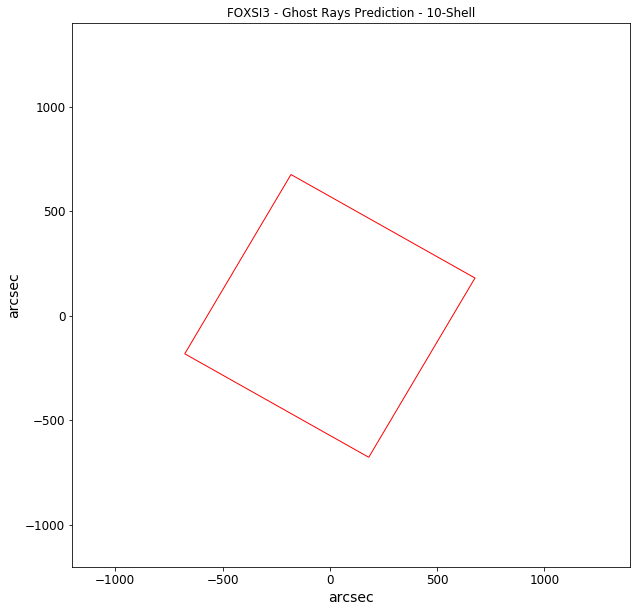

In [45]:
x,y = 0, 0 ## Target center
## Plotting
fig, ax = plt.subplots(figsize=(10,10));
## ornaments
plt.xlim(-1200,1400)
plt.ylim(-1200,1400)
plt.xlabel('arcsec',fontsize=14)
plt.ylabel('arcsec',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('FOXSI3 - Ghost Rays Prediction - 10-Shell')
''' ---- FOVs --- '''
## Pos6 - Si
l = 990
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[6]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[6]-135)) + 1)
rect = patches.Rectangle((x-l/2+mx,y-l/2+my),990,990,angle=ang[6],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)

plt.show()

In [54]:
All_Py2

[[-256.2343051249242,
  -1381.5753796561014,
  -10.56908864335363,
  172.542833437215,
  -93.69662121274078,
  52.879326076929544,
  -539.4997200768423,
  -111.81225680379066,
  -22.842539353637108,
  19.468295693548754,
  601.7108918637032,
  418.469856539919,
  -622.212773043467,
  -51.493308668239365,
  17.48224441271953,
  -259.4322919631783,
  404.7410338295731,
  140.36683058169274,
  -63.89666954802185,
  -231.67263387875016,
  354.22222869880886,
  283.39234438041035,
  412.94055820614886,
  -949.6943214582307,
  -1249.3552758128226,
  -310.78299022488784,
  -335.9743352483372,
  -767.3138641170408,
  -735.0161288065835,
  -1080.8083295920512,
  -264.511890764675,
  -924.5067572105113,
  1384.6569752179007,
  -37.125298371473875,
  408.59640267711285,
  335.7218823810742,
  151.16497309615255,
  863.257278950241,
  -61.53406674984615,
  683.0394466181058,
  -229.70798852786766,
  -41.58416175239617,
  663.7400791472625,
  -1310.9053954853903,
  197.52554533107113,
  -87.9413221

In [50]:
test1 = [ray for ray in Brays
          if (ray.des[2]==230 and ray.bounces ==2 )]

In [ ]:
test = [infovx for infov in Brays
          if (ray.des[2]==230 and ray.bounces ==2 )]

In [51]:
zip(All_Px2,All_Py2)

In [64]:
for i in range(0,len(All_Px2)):
    print(i)

0


In [70]:
len(All_Py2[0])

5013

In [72]:
All_Py2[0][0]

-256.2343051249242

In [84]:
xt,yt = -650.,40.
lfov = 480.
cfov = []
for xi,yi in zip(All_Px2[0],All_Py2[0]):
    if ((xi > xt-lfov) and (xi < xt+lfov)) and ((yi > yt-lfov) and (yi < yt+lfov)):
        cfov.append(xi)
for xi,yi in zip(All_Hx2[0],All_Hy2[0]):
    if ((xi > xt-lfov) and (xi < xt+lfov)) and ((yi > yt-lfov) and (yi < yt+lfov)):
        cfov.append(xi)

In [85]:
len(cfov)

334

In [86]:
334/100000 * 

0.00334